Problema no lineal con una y dos capas ocultas
Con base en las Actividades 1 y 2, modifica el dataset de entrada y salida para que
el modelo aprenda una relación no lineal en lugar de la conversión lineal Celsius ↔
Fahrenheit.
Ejemplo: utilizar la función cuadrática: y=x2+3x+5 u otra función propuesta por el
equipo.
Funciones matemáticas simples: y=sin(x), y=cos(x)+x2, y=ex
Problemas físicos
Energía cinética: E=1/2mv2
Área de un círculo: A=πr2
Caída libre: d=1/2gt2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_vals = np.array([-10, -5, -2, 0, 2, 5, 8, 10], dtype=float)
y_vals = x_vals**2 + 3*x_vals + 5

In [4]:
# Modelo A (Simple)
modelo_a = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(1)
])

In [6]:
modelo_a.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [12]:
hist_a = modelo_a.fit(x_vals, y_vals, epochs=500, verbose=False)

In [8]:
# Modelo B (Profundo... a dos capas)
modelo_b = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
modelo_b.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [13]:
hist_b = modelo_b.fit(x_vals, y_vals, epochs=500, verbose=False)

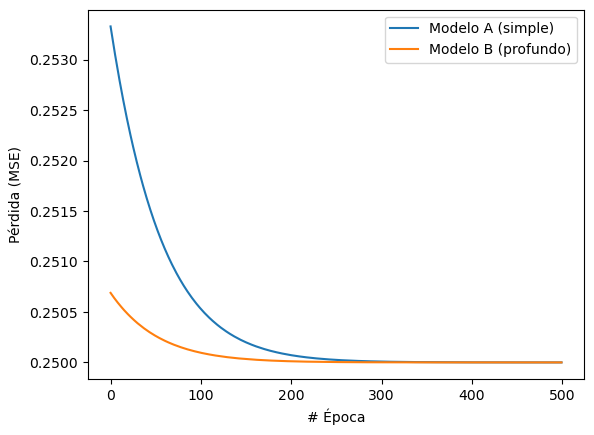

In [14]:
plt.xlabel("# Época")
plt.ylabel("Pérdida (MSE)")
plt.plot(hist_a.history["loss"], label="Modelo A (simple)")
plt.plot(hist_b.history["loss"], label="Modelo B (profundo)")
plt.legend()
plt.show()


In [15]:
x_test = 7.0
y_real = x_test**2 + 3*x_test + 5

In [20]:
pred_a = modelo_a.predict(np.array([[x_test]], dtype=float), verbose=0)
print("Predicción Modelo A (simple) para x =", x_test, "es:", pred_a[0][0], "; Real:", y_real)
pred_b = modelo_b.predict(np.array([[x_test]], dtype=float), verbose=0)
print("Predicción Modelo B (profundo) para x =", x_test, "es:", pred_b[0][0], "; Real:", y_real)

Predicción Modelo A (simple) para x = 7.0 es: 72.000694 ; Real: 75.0
Predicción Modelo B (profundo) para x = 7.0 es: 72.00018 ; Real: 75.0


In [21]:
print("Pesos y sesgos Modelo A")
for i, layer in enumerate(modelo_a.layers):
    print(f"Capa {i}:", layer.get_weights())

Pesos y sesgos Modelo A
Capa 0: [array([[-1.2465656 , -0.7729837 ,  1.6764631 , -1.5625398 , -0.83920807,
         1.3503183 , -0.73983574, -0.9226364 ,  2.5841868 ,  1.363344  ]],
      dtype=float32), array([-4.5772824, -3.8104243, -2.8002038, -4.2158847, -3.9733493,
       -8.867969 , -3.6991777, -4.613181 , -1.3728874, -8.356836 ],
      dtype=float32)]
Capa 1: [array([[1.9054408],
       [2.1341817],
       [1.9309223],
       [2.014568 ],
       [2.1714716],
       [4.3537173],
       [1.7155172],
       [1.8812332],
       [2.617057 ],
       [3.7559717]], dtype=float32), array([3.999572], dtype=float32)]


In [22]:
print("Pesos y sesgos Modelo B")
for i, layer in enumerate(modelo_b.layers):
    print(f"Capa {i}:", layer.get_weights())

Pesos y sesgos Modelo B
Capa 0: [array([[-0.76344156, -0.12160879, -0.6922476 , -0.78078145, -0.631378  ,
        -0.64582926, -0.0400745 , -0.10624555, -0.5401396 ,  1.7384198 ]],
      dtype=float32), array([-1.6665692, -1.6814497, -1.8958372, -3.7714157, -2.1564622,
       -2.0287383, -2.2184474, -1.9216461, -2.527349 , -1.5646263],
      dtype=float32)]
Capa 1: [array([[-6.3081515e-01,  9.2296708e-01, -4.6120578e-01,  4.5131948e-03,
        -8.5831487e-01],
       [-1.5081428e+00, -7.0284116e-01, -2.6737556e-01, -2.0738046e-03,
        -1.0633819e+00],
       [-1.1618836e+00,  7.3893666e-01, -5.4577982e-01,  3.2145071e-01,
        -6.3858950e-01],
       [-2.7718771e-01,  1.8443722e+00,  5.6532961e-01,  2.5929797e+00,
        -5.1705968e-01],
       [-4.5175901e-01,  9.5344400e-01,  2.6457870e-01,  9.0865433e-01,
        -6.2226045e-01],
       [-2.0629987e-01,  8.1116539e-01, -2.3028910e-01,  4.3743879e-01,
        -1.1855279e+00],
       [-1.4720964e+00, -7.5789869e-02,  6.050354